# Analyzing Historical Weather Data — Portland Airport Weather Station USW00024229

We'll answer a few questions:  
     1. Is there a correlation between Max/Min Temperatures (F) and Rain or Snow (in)?  
     2. Have rain and snow amounts changed over time?  

In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Make plots interactive
#%matplotlib notebook

## Load and clean data

In [2]:
# File to Load 
csv_file = "USW00024229.csv"

# Create a date time format
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

# Read in file to pandas df and convert the date
weather_data = pd.read_csv(csv_file, parse_dates=['DATE'], date_parser=d_parser)

weather_data

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


,DATE,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1936-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1936-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1936-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1936-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1936-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31152,2021-10-27,NaN,NaN,2.9,0.8,NaN,0.0,0.0,12.7,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31153,2021-10-28,NaN,NaN,3.7,1.5,NaN,0.0,0.0,15.2,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31154,2021-10-29,NaN,NaN,2.8,10.4,NaN,0.0,0.0,14.8,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31155,2021-10-30,NaN,NaN,7.2,0.0,NaN,0.0,0.0,10.2,15.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert C to F
weather_data['TMAX']=weather_data['TMAX'].apply(lambda x: x * 1.8 + 32).round(decimals=1)
weather_data['TMIN']=weather_data['TMIN'].apply(lambda x: x * 1.8 + 32).round(decimals=1)
weather_data['TAVG']=weather_data['TAVG'].apply(lambda x: x * 1.8 + 32).round(decimals=1)

In [4]:
# Convert tenths of mm to inches
weather_data['PRCP']=weather_data['PRCP'].apply(lambda x: x * 10 * 0.03937).round(decimals=1)

# Convert mm to inches
weather_data['SNOW']=weather_data['SNOW'].apply(lambda x: x * 0.03937).round(decimals=1)
weather_data['SNWD']=weather_data['SNWD'].apply(lambda x: x * 0.03937).round(decimals=1)

In [5]:
# Limit dates to 1940 – 2020
weather_data = weather_data.set_index(['DATE'])
df = weather_data.loc['1940-1-1':'2020-12-31']

In [6]:
# checking lengths
print(df['PRCP'].first_valid_index())
print(df['PRCP'].last_valid_index())
print(df['TMAX'].first_valid_index())
print(df['TMAX'].last_valid_index())

1940-01-01 00:00:00
2020-12-31 00:00:00
1940-01-01 00:00:00
2020-12-31 00:00:00


## 1. Is there a correlation between Max/Min Temperatures (F) and Rain or Snow (in)?
My hypothesis would have been yes, maybe for snow especially. But exploring the data below the answer is no!

In [7]:
#Drop rows missing data needed to find corrrelation stats
corr_df = df.dropna(subset=['PRCP','TMAX','TMIN','SNOW'])
corr_df

,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
1940-01-01,NaN,NaN,NaN,2.3,NaN,0.0,0.0,NaN,57.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-02,NaN,NaN,NaN,1.2,NaN,0.0,0.0,NaN,55.9,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-03,NaN,NaN,NaN,4.5,NaN,0.0,0.0,NaN,48.9,37.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-04,NaN,NaN,NaN,3.3,NaN,0.0,0.0,NaN,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-05,NaN,NaN,NaN,0.5,NaN,0.0,0.0,NaN,50.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,4.0,0.1,NaN,0.0,0.0,46.0,50.0,39.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,2.0,0.0,NaN,0.0,0.0,38.7,46.0,29.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,1.5,0.3,NaN,0.0,0.0,34.0,41.0,27.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
corr_df.count()

ACMH    11261
ACSH    11261
AWND    13513
PRCP    29461
PSUN     6940
SNOW    29461
SNWD    29429
TAVG     5510
TMAX    29461
TMIN    29461
TSUN    12473
WESD     5897
WSFG    13443
WT01     9785
WT02     1600
WT03      521
WT04      264
WT05      671
WT06      202
WT07       18
WT08     3707
WT09       90
WT10        4
WT11        2
WT12        1
WT13     2332
WT14      659
WT15       10
WT16    12673
WT17       50
WT18      834
WT19       10
WT21      240
WT22       88
dtype: int64

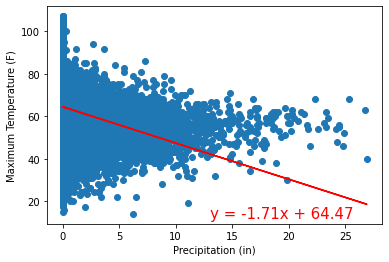

The correlation between both factors is -0.27


In [9]:
# RAIN & MAX TEMP — correlated?
x1 = corr_df['PRCP']
y1 = corr_df['TMAX']
plt.xlabel('Precipitation (in)')
plt.ylabel('Maximum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(13,12),fontsize=15,color="red")
plt.show()


#Pearson correlation coefficient 
correlation = st.pearsonr(x1,y1)
print(f"The correlation between both factors is {round(correlation[0],2)}")

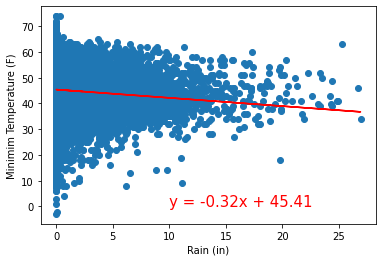

r-squared: 0.005373277935597171
The correlation between both factors is -0.07


In [10]:
# RAIN & MIN TEMP — correlated?
x2 = corr_df['PRCP']
y2 = corr_df['TMIN']
plt.xlabel('Rain (in)')
plt.ylabel('Minimim Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)


#Pearson correlation coefficient 
correlation = st.pearsonr(x2,y2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

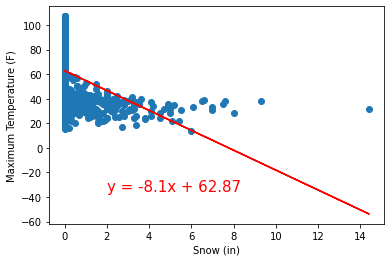

r-squared: 0.017754469307329424
The correlation between both factors is -0.13


In [11]:
# SNOW & MAX TEMP — correlated?
x3 = corr_df['SNOW']
y3 = corr_df['TMAX']
plt.xlabel('Snow (in)')
plt.ylabel('Maximum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x3, y3)
regress_values = x3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x3,y3)
plt.plot(x3,regress_values,"r-")
plt.annotate(line_eq,(2,-35),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)

#Pearson correlation coefficient 
correlation = st.pearsonr(x3,y3)
print(f"The correlation between both factors is {round(correlation[0],2)}")

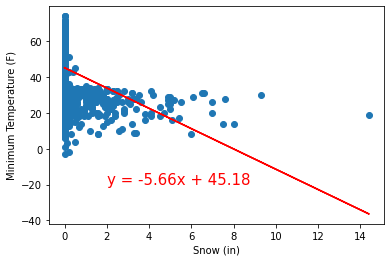

r-squared: 0.018701836693990823
The correlation between both factors is -0.14


In [12]:
# SNOW & MIN TEMP — correlated?
x4 = corr_df['SNOW']
y4 = corr_df['TMIN']
plt.xlabel('Snow (in)')
plt.ylabel('Minimum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x4, y4)
regress_values = x4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x4,y4)
plt.plot(x4,regress_values,"r-")
plt.annotate(line_eq,(2,-20),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)

#Pearson correlation coefficient 
correlation = st.pearsonr(x4,y4)
print(f"The correlation between both factors is {round(correlation[0],2)}")

## Have rain and snow amounts changed over time?  
My hypothesis is we get more rain and less snow.

In [14]:
# Create a new dataframe for binning
bins_df = corr_df[['PRCP','SNOW','TMAX','TMIN',]].copy()


In [21]:
# Make DATE a column instead of index
bins_df.reset_index(level=0, inplace=True)
bins_df

,DATE,PRCP,SNOW,TMAX,TMIN
0,1940-01-01,2.3,0.0,57.0,41.0
1,1940-01-02,1.2,0.0,55.9,43.0
2,1940-01-03,4.5,0.0,48.9,37.9
3,1940-01-04,3.3,0.0,52.0,43.0
4,1940-01-05,0.5,0.0,50.0,36.0
...,...,...,...,...,...
29456,2020-12-27,0.1,0.0,50.0,39.9
29457,2020-12-28,0.0,0.0,46.0,29.1
29458,2020-12-29,0.3,0.0,41.0,27.1
29459,2020-12-30,3.9,0.0,48.9,39.0


In [29]:
# Create the bins in which Data will be held
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Create the names for the five bins
group_names = ["1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
bins_df["DEC"] = pd.cut(bins_df.DATE.dt.year, bins, labels=group_names, include_lowest=True)


In [30]:
bins_df.dtypes

DATE    datetime64[ns]
PRCP           float64
SNOW           float64
TMAX           float64
TMIN           float64
DEC           category
dtype: object

In [32]:
# Create a GroupBy object based upon "View Group"
bins_group = bins_df.groupby("DEC")

# Find how many rows fall into each bin
print(bins_group["DEC"].count())

DEC
1940s    3894
1950s    3653
1960s    3652
1970s    3653
1980s    3652
1990s    3652
2000s    3652
2010s    3653
Name: DEC, dtype: int64


In [33]:
# Get the average of each column within the GroupBy object
bins_group[['PRCP','SNOW']].sum()

,PRCP,SNOW
DEC,,
1940s,4074.7,91.5
1950s,3753.6,84.7
1960s,3714.7,68.8
1970s,3740.7,48.7
1980s,3440.8,41.3
1990s,3939.6,42.9
2000s,3418.2,45.0
2010s,3703.3,39.7


In [34]:
# Get the average of each column within the GroupBy object
bins_group[['TMAX','TMIN']].mean()

,TMAX,TMIN
DEC,,
1940s,62.442527,44.744787
1950s,61.373337,43.704161
1960s,62.269222,43.751451
1970s,62.463783,44.517711
1980s,63.071714,45.336720
1990s,63.371386,45.969031
2000s,63.058598,45.940909
2010s,63.913797,46.759951
